In [16]:
import torch
from tqdm import tqdm
import gymnasium as gym
from Qlearning_agent.Qlearning import QLearner, train_agent_alpha
import gymnasium_env
import numpy as np
import matplotlib.pyplot as plt
from gymnasium_env.wrappers.probability import SkipMoveWrapper

In [17]:
from gymnasium.envs.registration import register

try:
    register(
        id="gymnasium_env/GridWorld-v0",
        entry_point="gymnasium_env.envs:GridWorldEnv",
    )
    print("Environment 'gymnasium_env/GridWorld-v0' registered successfully.")
except gym.error.AlreadyRegistered:
    print("Environment 'gymnasium_env/GridWorld-v0' already registered.")

Environment 'gymnasium_env/GridWorld-v0' registered successfully.


In [18]:
env = gym.make("gymnasium_env/GridWorld-v0", render_mode="rgb_array")
env = SkipMoveWrapper(env)

In [19]:
max_epsilon = 1
min_epsilon = 0.01
decay = 0.005
train_episodes = 2000
test_episodes = 100
max_steps = 500

In [20]:
raw_states = []
training_rewards_alpha = []
epsilons_alpha = []
state_visit_count = {}


def train_agent_alpha():
    for episode in tqdm(range(train_episodes), desc="Training Progress"):
        # Reseting the environment each time as per requirement
        state, info = env.reset()
        # Starting the tracker for the rewards
        total_training_rewards = 0
        state = tuple(state)

        for step in range(max_steps):
            raw_states.append(state)
            action = agent.choose_action(state)
            ### STEPs 3 & 4: performing the action and getting the reward
            # Taking the action and getting the reward and outcome state
            new_state, reward, terminated, truncated, info = env.step(action)
            new_state = tuple(new_state)

            if state not in state_visit_count:
                state_visit_count[state] = 0
            state_visit_count[state] += 1

            alpha = 60 / (59 + state_visit_count[state])

            agent.update_Q(state, new_state, action, reward, alpha)
            total_training_rewards += reward
            state = new_state

            # Ending the episode
            if terminated or truncated:
                break

        # Cutting down on exploration by reducing the epsilon
        agent.epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episode)

        # Adding the total reward and reduced epsilon values
        training_rewards_alpha.append(total_training_rewards)
        epsilons_alpha.append(agent.epsilon)



Training Progress: 100%|██████████| 2000/2000 [00:21<00:00, 92.27it/s] 


Training score over time: -36.69080000000024


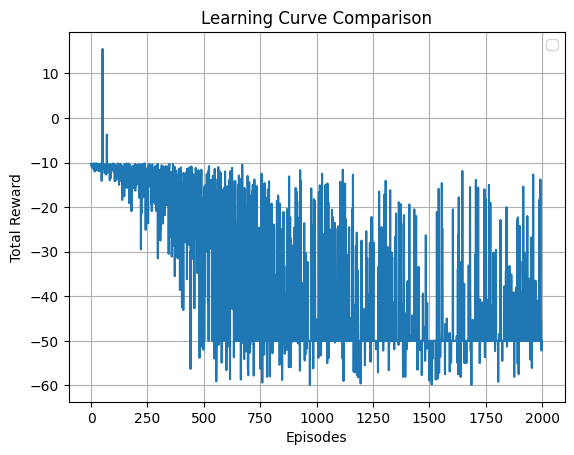

In [14]:
n_actions = env.action_space.n
agent = QLearner(n_actions=n_actions)
train_agent_alpha()
print("Training score over time: " + str(sum(training_rewards_alpha)/train_episodes))
x = range(train_episodes)
plt.plot(x, training_rewards_alpha)
plt.title("Learning Curve Comparison")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=2000)

ImportError: DLL load failed while importing _C: Nie można odnaleźć określonego modułu.